# Ejercicio 4 Capitulo 3

## Programación como Herramienta para la Ingeniería (IIC2115)

diego.herrerag00@uc.cl

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# importar librerias de sklearn con sus modulos y submodulos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, classification_report

In [3]:
df_accidentes = pd.read_csv('accidentes.csv')
df_accidentes.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,2016010000005,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,0.0,Metropolitan Police,Dry,Single carriageway,-,30.0,02:30,Urban,Fine no high winds,No
1,2016010000006,A,207.0,Unclassified,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,0.0,Metropolitan Police,Dry,Single carriageway,-,30.0,00:37,Urban,Fine no high winds,No
2,2016010000008,A,4020.0,A,4020.0,Slight,-,2016-11-01,Tuesday,Yes,...,0.0,Metropolitan Police,Dry,Roundabout,-,30.0,01:25,Urban,Fine no high winds,No
3,2016010000016,A,217.0,A,217.0,Slight,-,2016-11-01,Tuesday,Yes,...,0.0,Metropolitan Police,Dry,Single carriageway,-,30.0,09:15,Urban,Fine no high winds,No
4,2016010000018,A,312.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,0.0,Metropolitan Police,Dry,Dual carriageway,-,40.0,07:53,Urban,Fine no high winds,No


In [4]:
df_vehiculos = pd.read_csv('vehiculos.csv')
df_vehiculos.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,2016010000005,46 - 55,NaN,Urban area,3.0,NaN,-,-,Journey as part of work,Not at or within 20 metres of junction,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Offside
1,2016010000005,21 - 25,4.0,Urban area,4.0,124.0,-,-,Not known,Not at or within 20 metres of junction,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front
2,2016010000006,36 - 45,1.0,Urban area,10.0,1461.0,Kerb,-,Not known,Cleared junction or waiting/parked at junction...,...,Female,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Nearside
3,2016010000008,21 - 25,5.0,Urban area,8.0,1390.0,-,-,Not known,Entering roundabout,...,Male,Overturned,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front
4,2016010000016,46 - 55,7.0,Urban area,9.0,6692.0,-,-,Journey as part of work,Approaching junction or waiting/parked at junc...,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Bus or coach (17 or more pass seats),No,Did not impact


### Limpiamos los data frames

#### Accidentes

In [5]:
df_accidentes.shape

(136621, 33)

In [6]:
df_accidentes.isnull().sum()

Accident_Index                                   0
1st_Road_Class                                   0
1st_Road_Number                                  0
2nd_Road_Class                                   0
2nd_Road_Number                                617
Accident_Severity                                0
Carriageway_Hazards                              0
Date                                             0
Day_of_Week                                      0
Did_Police_Officer_Attend_Scene_of_Accident      0
Junction_Control                                 0
Junction_Detail                                  0
Latitude                                         7
Light_Conditions                                 0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
Location_Easting_OSGR                            7
Location_Northing_OSGR                           7
Longitude                                        7
LSOA_of_Accident_Location      

Dado que la cantidad de valores nulos es muy bajo proporcionalmente hablando con respecto a la cantidad de datos totales (136621 filas y un maximo de 631 filas con al menos un valor nulo), podemos eliminar todos los valores nulos con `dropna()`

In [7]:
df_accidentes = df_accidentes.dropna()
df_accidentes.isnull().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

In [8]:
df_accidentes.shape

(135323, 33)

Como podemos ver, eliminamos absolutamente todos los valores nulos, y la nueva cantidad de datos es similar a la que había originalmente.

#### Vehiculos

In [9]:
df_vehiculos.shape

(252500, 23)

In [10]:
df_vehiculos.isnull().sum()

Accident_Index                          0
Age_Band_of_Driver                      0
Age_of_Vehicle                      68175
Driver_Home_Area_Type                   0
Driver_IMD_Decile                   67565
Engine_Capacity_.CC.                58780
Hit_Object_in_Carriageway               0
Hit_Object_off_Carriageway              0
Journey_Purpose_of_Driver               0
Junction_Location                       0
make                                    0
model                                   0
Propulsion_Code                         0
Sex_of_Driver                           0
Skidding_and_Overturning                0
Towing_and_Articulation                 0
Vehicle_Leaving_Carriageway             0
Vehicle_Location.Restricted_Lane      960
Vehicle_Manoeuvre                       0
Vehicle_Reference                       0
Vehicle_Type                            0
Was_Vehicle_Left_Hand_Drive             0
X1st_Point_of_Impact                    0
dtype: int64

Podemos apreciar que en este caso, hay un numero significativo de valores nulos con respecto a los datos totales (de las 252500 filas, se tiene un maximo de 68175 de ellas con al menos un valor nulo, mas o menos un 25%, lo cual es significativo). Por lo tanto, reemplazaremos dichos valores nulos por su promedio de su columna respectiva. 

El siguiente codigo es la forma 'automatizada' de hacerlo, sin embargo, tiene un alto costo computacional dada la gran cantidad de datos que contiene el dataframe (aproximadamente 250.000 filas), entonces, ejecutarlo requeriría mucho tiempo. 

In [ ]:
columnas_con_nulos = []

for columna in df_vehiculos.columns:
    for dato in df_vehiculos[columna]:
        if pd.isna(dato):
            columnas_con_nulos.append(columna)
            
            
for columna in columnas_con_nulos:
    valor_medio = df_vehiculos[columna].mean()

    for valor in df_vehiculos[columna]:
        if pd.isna(valor):
            df_vehiculos[columna] = df_vehiculos[columna].replace(valor, valor_medio)

df_vehiculos.isna().sum()

Entonces para efectos prácticos, simplemente lo hacemos menos automatizado escribiendo explicitamente las columnas que tienen valores nulos del dataframe, ya que de esa manera, el costo computacional es más bajo. 

In [12]:
columnas_con_nulos = ['Age_of_Vehicle','Driver_IMD_Decile','Engine_Capacity_.CC.','Vehicle_Location.Restricted_Lane']


for columna in columnas_con_nulos:
    valor_medio = df_vehiculos[columna].mean()

    for valor in df_vehiculos[columna]:
        if pd.isna(valor):
            df_vehiculos[columna] = df_vehiculos[columna].replace(valor, valor_medio)

df_vehiculos.isna().sum()

Accident_Index                      0
Age_Band_of_Driver                  0
Age_of_Vehicle                      0
Driver_Home_Area_Type               0
Driver_IMD_Decile                   0
Engine_Capacity_.CC.                0
Hit_Object_in_Carriageway           0
Hit_Object_off_Carriageway          0
Journey_Purpose_of_Driver           0
Junction_Location                   0
make                                0
model                               0
Propulsion_Code                     0
Sex_of_Driver                       0
Skidding_and_Overturning            0
Towing_and_Articulation             0
Vehicle_Leaving_Carriageway         0
Vehicle_Location.Restricted_Lane    0
Vehicle_Manoeuvre                   0
Vehicle_Reference                   0
Vehicle_Type                        0
Was_Vehicle_Left_Hand_Drive         0
X1st_Point_of_Impact                0
dtype: int64

Una vez limpiados ambos dataframes, podemos proceder a las misiones. 

## Misión 1: Factores de severidad

In [13]:
df_accidentes.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'InScotland'],
      dtype='object')

In [14]:
df_vehiculos.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact'],
      dtype='object')

Nos podemos dar cuenta que la severidad de los accidentes será nuestro target, y corresponde a la columna Àccident_Severity`del dataframe de accidentes. Ahora bien, ambos dataframes están relacionados por el indice de accidente, tal como nos dice el enunciado. Por lo tanto, antes de proceder a hacer cualquier modelo para analizar la severidad, crearemos un nuevo data frame con la unión de ambos, según el indice del accidente al cual cada fila corresponda. 

In [15]:
# Para unirlos hacemos un merge de los dataframes de accidentes y vehículos usando la columna 'Accident_Index' como el indicador común.
df = pd.merge(df_accidentes, df_vehiculos, on='Accident_Index', how='inner')
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,2016010000005,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Offside
1,2016010000005,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front
2,2016010000006,A,207.0,Unclassified,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,Female,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Nearside
3,2016010000008,A,4020.0,A,4020.0,Slight,-,2016-11-01,Tuesday,Yes,...,Male,Overturned,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front
4,2016010000016,A,217.0,A,217.0,Slight,-,2016-11-01,Tuesday,Yes,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Bus or coach (17 or more pass seats),No,Did not impact


In [16]:
df.shape

(250088, 55)

In [17]:
df.isnull().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

Ahora bien, podemos notar que el nuevo data frame está compuesto por muchisimas columnas, lo cual, hacer un modelo de machine learning para predecir la severidad de los accidentes, que será nuestro target, de forma directa puede provocar overfitting. Por lo tanto, debemos elegir columnas especificas que sean útiles para dicho objetivo. Hacerlo al ojo puede ser útil, sin embargo, no es la mejor forma para este caso donde se contiene un dataframe con 54 columnas caracteristicas para un target. Por lo tanto, usaremos el modelo `Random Foresst`, modelo perteneciente a la familia de Arboles de desición, del cual, el funcionamiento de este tipo de modelos se basa en la construcción  de una estructura de árbol, en base a tests/umbrales calculados para cada característica analizada, lo cual es justo lo que queremos analizar pero no al ojo. Además, este árbol es construido hasta llegar a los nodos hoja, donde cada una entrega la predicción o clasificación de una caractersitica especifica, es decir, entrega la determinación de que tan útil es esa caracteristica para predecir el target en cuestión. Además, estos modelos de arboles tienen un alto nivel de explicabilidad que los hace siempre buenos candidatos cuando se cuenta con una gran cantidad de datos.


In [18]:
X = df.drop(columns=['Accident_Severity', 'Accident_Index'])
y = df['Accident_Severity']

In [19]:
# Identificamos las columnas categóricas
columnas_categoricas = X.select_dtypes(include='object').columns

In [20]:
label_encoders = {} # Creamos un diccionario para guardar los LabelEncoders de cada columna categorica por si queremos invertir después
for columna in columnas_categoricas:
    label = LabelEncoder()
    X[columna] = label.fit_transform(X[columna])
    label_encoders[columna] = label 

In [21]:
label_encoders

{'1st_Road_Class': LabelEncoder(),
 '2nd_Road_Class': LabelEncoder(),
 'Carriageway_Hazards': LabelEncoder(),
 'Date': LabelEncoder(),
 'Day_of_Week': LabelEncoder(),
 'Did_Police_Officer_Attend_Scene_of_Accident': LabelEncoder(),
 'Junction_Control': LabelEncoder(),
 'Junction_Detail': LabelEncoder(),
 'Light_Conditions': LabelEncoder(),
 'Local_Authority_(District)': LabelEncoder(),
 'Local_Authority_(Highway)': LabelEncoder(),
 'LSOA_of_Accident_Location': LabelEncoder(),
 'Police_Force': LabelEncoder(),
 'Road_Surface_Conditions': LabelEncoder(),
 'Road_Type': LabelEncoder(),
 'Special_Conditions_at_Site': LabelEncoder(),
 'Time': LabelEncoder(),
 'Urban_or_Rural_Area': LabelEncoder(),
 'Weather_Conditions': LabelEncoder(),
 'InScotland': LabelEncoder(),
 'Age_Band_of_Driver': LabelEncoder(),
 'Driver_Home_Area_Type': LabelEncoder(),
 'Hit_Object_in_Carriageway': LabelEncoder(),
 'Hit_Object_off_Carriageway': LabelEncoder(),
 'Journey_Purpose_of_Driver': LabelEncoder(),
 'Junction_

In [22]:
X.head(15)

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,0,4006.0,0,0.0,0,305,5,1,2,4,...,2,0,4,1,0.0,15,1,18,1,5
1,0,4006.0,0,0.0,0,305,5,1,2,4,...,2,0,4,1,0.0,4,2,12,1,3
2,0,207.0,6,0.0,0,305,5,1,3,5,...,1,6,4,2,0.0,4,1,2,1,4
3,0,4020.0,1,4020.0,0,305,5,1,3,7,...,2,4,4,1,0.0,4,1,2,1,3
4,0,217.0,1,217.0,0,305,5,1,1,9,...,2,0,4,1,0.0,4,1,1,1,2
5,0,312.0,0,0.0,0,305,5,1,2,4,...,2,0,4,1,0.0,1,1,2,1,3
6,0,312.0,0,0.0,0,305,5,1,2,4,...,2,0,4,1,0.0,4,2,16,1,4
7,0,23.0,6,0.0,0,305,5,1,3,9,...,1,0,4,2,0.0,4,1,2,1,0
8,0,23.0,6,0.0,0,305,5,1,3,9,...,2,0,4,1,0.0,4,2,2,1,3
9,3,0.0,0,0.0,0,305,5,1,2,4,...,2,0,4,1,0.0,4,1,18,1,4


In [23]:
X.shape

(250088, 53)

Como podemos ver, gracias a la codificación con `LabelEncoder`, todas las caracteristicas categoricas que teníamos ahora son numericas. Ahora procederemos a verificar que tan útil es cada una para la predicción de la severidad de accidentes. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Procederemos a entrenar el modelo de Random Forest

In [25]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Una vez entrenado, antes de visualizar la relevancia de cada caracteristica en relación al target, es necesario testear el `RandomForesst`

In [26]:
y_predict = random_forest.predict(X_test)

Una vez testeado, con la predicción obtenida, vemos sus resultados con las metricas: `Accuracy Score`, `Balance_Accuracy_Score`,`F1 Score` y un `Clasification report`

In [27]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_predict))
print("F1 macro:", f1_score(y_test, y_predict, average='macro'))
print(classification_report(y_test, y_predict, digits=3))

Accuracy: 0.8458021778826289
Balanced Acc: 0.3701636774821094
F1 macro: 0.37603202642414907
              precision    recall  f1-score   support

       Fatal      1.000     0.046     0.088       869
     Serious      0.734     0.068     0.124     11295
      Slight      0.847     0.997     0.916     62863

    accuracy                          0.846     75027
   macro avg      0.861     0.370     0.376     75027
weighted avg      0.832     0.846     0.787     75027



De los resultados obtenidos, podemos concluir que el modelo está sesgado, así, la accuracy parece buena, pero el modelo no detecta casos severos. Entonces, procederemos a volver a entrenarlo, pero con muchos más parametros y muchos más robustos, lo que eso sí un mayor costo computacional. 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) # Al split le agregamos el parametro 'Stratify' para que el split sea 
                                                                                                        # estratificado, es decir, que mantenga la proporción de clases en 
                                                                                                        # ambos conjuntos (train y test)

Volveremos a crear el modelo pero con mayor complejidad y parametros 

In [29]:
random_forest = RandomForestClassifier(n_estimators=400, random_state=42,class_weight='balanced',n_jobs=-1) # Aqui el class_weight='balanced' ayuda a manejar el desbalanceo 
                                                                                                            # de clases. N_jobs=-1 usa todos los núcleos del procesador para 
                                                                                                            # entrenar el modelo.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest mejorado (sin tanta complejidad)
random_forest = RandomForestClassifier(
    n_estimators=800,            # más estimadores nos da una mejor estabilidad
    max_depth=25,                # límite para controlar overfitting
    min_samples_split=4,         # Al aumenta el minmo de muestras, se requiere más muestras para dividir, lo que generaliza mejor
    min_samples_leaf=2,          # Se evita sobreajuste
    max_features="sqrt",         # Cada árbol usa sqrt(n_features) para tener unbuen balance
    class_weight="balanced",     # Se corrige  el desbalanceo de clases
    bootstrap=True,              # Muestreo con reemplazo
    n_jobs=-1,                   # Usa todos los núcleos del procesador local para entrenar el modelo.
    random_state=42
)


Entrenamos el nuevo modelo creado

In [31]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=800, n_jobs=-1, random_state=42)

Una vez ya entrenado, testeamos el nuevo modelo. 

In [32]:
y_predict = random_forest.predict(X_test)

Y al igual que antes, visualizamos el resultado del entrenamiento para sacar conclusiones. 

In [33]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Balanced Acc:", balanced_accuracy_score(y_test, y_predict))
print("F1 macro:", f1_score(y_test, y_predict, average='macro'))
print(classification_report(y_test, y_predict, digits=3))

Accuracy: 0.8480280432377677
Balanced Acc: 0.4057510779766549
F1 macro: 0.43051403078105127
              precision    recall  f1-score   support

       Fatal      0.583     0.143     0.229       891
     Serious      0.700     0.081     0.146     11134
      Slight      0.851     0.994     0.917     63002

    accuracy                          0.848     75027
   macro avg      0.711     0.406     0.431     75027
weighted avg      0.826     0.848     0.794     75027



Dado estos resultados obtenidos, que no son del todo convincentes, es posible quizas analizar y decidir por usar otro modelo. Un modelo que nos puede ser útil también para estos casos es de regresión logística usando `make_pipeline`, que es una librería que nos sirve para juntar el preprocesamiento y el modelo en un solo objeto, para que al entrenar y/o predicir se apliquen en orden correcto, es decir, se transorme y se modele sin una perdida de datos, y por otro lado, es una de las formas más simples y segura de encadenar pasos, del cual, no requiere de la ejecución de un split antes de entrenar el modelo. 

In [54]:
# Volvemos a realizar el split porque queremos volver a entrenar un modelo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) # Al split le agregamos el parametro 'Stratify' para que el split sea 


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Escalado 
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

modelo_regresion = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l1", solver="saga", max_iter=5000, C=0.1)
)
modelo_regresion.fit(X, y) # Entrenamiento

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=5000, penalty='l1',
                                    solver='saga'))])

In [ ]:
# Creación de modelo y Entrenamiento
modelo_regresion = LogisticRegression(penalty="l1", solver="saga", max_iter=5000, C=0.1)
regresion_logistica.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=5000, penalty='l1', solver='saga')

In [56]:
# Predicción 
y_predict = modelo_regresion.predict(X)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, classification_report

print("Accuracy:", accuracy_score(y, y_predict))
print("Balanced Acc:", balanced_accuracy_score(y, y_predict))
print("F1 macro:", f1_score(y, y_predict, average='macro'))
print(classification_report(y, y_predict, digits=3))

Accuracy: 0.8396604395252871
Balanced Acc: 0.3348152315920503
F1 macro: 0.3075694359217307
              precision    recall  f1-score   support

       Fatal      0.235     0.003     0.005      2972
     Serious      0.414     0.002     0.005     37112
      Slight      0.840     0.999     0.913    210004

    accuracy                          0.840    250088
   macro avg      0.496     0.335     0.308    250088
weighted avg      0.770     0.840     0.767    250088



Una vez vistos las metricas, obtenemos el valor de que tan importante, o bien, que tan influyente es nuestra caracteristica para predecir nuestri target.

In [ ]:
importancias = abs(modelo_regresion.named_steps["logisticregression"].coef_[0]) # Tomando el valor absoluto de los coeficientes de la regresion logistica, medimos la "fuerza" de cada 
                                                                                # caracteristica para predecir nuestro target
importancias

array([0.26889749, 0.00273132, 0.24996202, 0.08734675, 0.06194266,
       0.        , 0.        , 0.15971742, 0.        , 0.05170993,
       0.04352746, 0.21172195, 0.0038185 , 0.        , 0.00602856,
       0.        , 0.        , 0.05683211, 0.09613642, 0.00117103,
       0.12061433, 0.12587196, 0.02662492, 0.        , 0.16344567,
       0.01421273, 0.30392814, 0.07299442, 0.1198479 , 0.04853606,
       0.06743955, 0.06506436, 0.02107366, 0.        , 0.        ,
       0.12841677, 0.01771282, 0.0647089 , 0.06357664, 0.        ,
       0.00454797, 0.04904139, 0.05261705, 0.02365287, 0.        ,
       0.03343758, 0.06389801, 0.08155102, 0.22490243, 0.02832786,
       0.        , 0.        , 0.01651187])

Una vez que tenemos los valores de que tan infliyentes son las caractersiticas para predecir el target, que están ordenados con el mismo orden en que se encuentran las caractersiticas en la matriz X, los almacenamos en un diccionario. 

In [59]:
diccionario_caracteristicas_importancias = {}

for i in range(len(X.columns)):
    columna = X.columns[i]
    importancia = importancias[i]
    diccionario_caracteristicas_importancias[columna] = round(importancia, 4)


# Le pedimos al chat un codigo para reordenar un diccionario por valor, para que este ordenado de manera descendente
import operator
diccionario_caracteristicas_importancias = dict(sorted(diccionario_caracteristicas_importancias.items(), key=operator.itemgetter(1), reverse=True))

diccionario_caracteristicas_importancias

{'Speed_limit': 0.3039,
 '1st_Road_Class': 0.2689,
 '2nd_Road_Class': 0.25,
 'Vehicle_Manoeuvre': 0.2249,
 'Light_Conditions': 0.2117,
 'Road_Type': 0.1634,
 'Did_Police_Officer_Attend_Scene_of_Accident': 0.1597,
 'Engine_Capacity_.CC.': 0.1284,
 'Pedestrian_Crossing-Physical_Facilities': 0.1259,
 'Pedestrian_Crossing-Human_Control': 0.1206,
 'Urban_or_Rural_Area': 0.1198,
 'Number_of_Casualties': 0.0961,
 '2nd_Road_Number': 0.0873,
 'Vehicle_Location.Restricted_Lane': 0.0816,
 'Time': 0.073,
 'InScotland': 0.0674,
 'Age_Band_of_Driver': 0.0651,
 'Hit_Object_off_Carriageway': 0.0647,
 'Vehicle_Leaving_Carriageway': 0.0639,
 'Journey_Purpose_of_Driver': 0.0636,
 'Carriageway_Hazards': 0.0619,
 'LSOA_of_Accident_Location': 0.0568,
 'Propulsion_Code': 0.0526,
 'Junction_Detail': 0.0517,
 'model': 0.049,
 'Weather_Conditions': 0.0485,
 'Latitude': 0.0435,
 'Towing_and_Articulation': 0.0334,
 'Vehicle_Reference': 0.0283,
 'Police_Force': 0.0266,
 'Sex_of_Driver': 0.0237,
 'Age_of_Vehicle': 

In [60]:
len(diccionario_caracteristicas_importancias)

53

Usaremos, de las 53 columnas, las primeras 20 más relevantes, procurando tener un equilibrio tanto para tener solo la información que sirve para predecir, como también para no caer en el overfitting.

In [61]:
# Filtramos las 20 caracteristicas más importantes
caracteristicas_mas_importantes = dict(list(diccionario_caracteristicas_importancias.items())[:20])

caracteristicas_mas_importantes

{'Speed_limit': 0.3039,
 '1st_Road_Class': 0.2689,
 '2nd_Road_Class': 0.25,
 'Vehicle_Manoeuvre': 0.2249,
 'Light_Conditions': 0.2117,
 'Road_Type': 0.1634,
 'Did_Police_Officer_Attend_Scene_of_Accident': 0.1597,
 'Engine_Capacity_.CC.': 0.1284,
 'Pedestrian_Crossing-Physical_Facilities': 0.1259,
 'Pedestrian_Crossing-Human_Control': 0.1206,
 'Urban_or_Rural_Area': 0.1198,
 'Number_of_Casualties': 0.0961,
 '2nd_Road_Number': 0.0873,
 'Vehicle_Location.Restricted_Lane': 0.0816,
 'Time': 0.073,
 'InScotland': 0.0674,
 'Age_Band_of_Driver': 0.0651,
 'Hit_Object_off_Carriageway': 0.0647,
 'Vehicle_Leaving_Carriageway': 0.0639,
 'Journey_Purpose_of_Driver': 0.0636}

Ahora que ya tenemos las caracteristicas más importantes, vamos crear una lista para almacenarlas y usarlas para la predicción de nuestro target posteriormente con otro modelo de Machine Learning

In [62]:
caracteristicas = list(caracteristicas_mas_importantes.keys())

caracteristicas

['Speed_limit',
 '1st_Road_Class',
 '2nd_Road_Class',
 'Vehicle_Manoeuvre',
 'Light_Conditions',
 'Road_Type',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Engine_Capacity_.CC.',
 'Pedestrian_Crossing-Physical_Facilities',
 'Pedestrian_Crossing-Human_Control',
 'Urban_or_Rural_Area',
 'Number_of_Casualties',
 '2nd_Road_Number',
 'Vehicle_Location.Restricted_Lane',
 'Time',
 'InScotland',
 'Age_Band_of_Driver',
 'Hit_Object_off_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Journey_Purpose_of_Driver']

## Misión 2: Decisiones Operativas 

Para esta misión nos piden implementar un modelo que nos entregue probabilidades sobre un resultado operativo, como el ejemplo del enunciado, la respuesta policial. Para lograrlo, un modelo factible podría ser el de la Regresión Logística, ya que entrega probabilidades discretas y es facil de calibrar. Otro que podría ser usado es el Random Forest, ya que, entrega también probabilidades, sin embargo, puede requerir calibraciones adicionales, como por ejemplo Platt Scaling, que ajusta probabilidades usando la misma regresión logistica sobre salidas del modelo, útil para problemas binarios, o bien, otra calibración puede ser Isotonic regression, que ajusta las probabilidades usando una función más flexible que Platt Scaling, pero que requiere más datos. 

Usaremos por mientras Regresión Logística. 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Buscaremos la columna correspondiente a la respuesta policial. Dado que no sabemos el nombre exacto de dicha columna en nuestro DataFrame, buscamos alguna columna que contenga el nombre de la Policia, ya que es una referencia.

In [64]:
for columna in df.columns:
    if "Police" in columna or "police" in columna:
        print(columna)

Did_Police_Officer_Attend_Scene_of_Accident
Police_Force


Vemos que hay dos columnas que contienen a "Police" en su nombre. Analicemos los datos de cada una para determinar cual de las dos corresponde a la respuesta policial.

In [65]:
df["Did_Police_Officer_Attend_Scene_of_Accident"]

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
250083    Yes
250084    Yes
250085    Yes
250086    Yes
250087    Yes
Name: Did_Police_Officer_Attend_Scene_of_Accident, Length: 250088, dtype: object

In [66]:
df["Police_Force"]

0           Metropolitan Police
1           Metropolitan Police
2           Metropolitan Police
3           Metropolitan Police
4           Metropolitan Police
                  ...          
250083    Dumfries and Galloway
250084    Dumfries and Galloway
250085    Dumfries and Galloway
250086    Dumfries and Galloway
250087    Dumfries and Galloway
Name: Police_Force, Length: 250088, dtype: object

Ahora, si queremos buscar que especificamente contenga algo relacionado a respuesta, podemos buscar si alguna columna contiene en su nombre "Response". 

In [67]:
for columna in df.columns:
    if "Response" in columna or "response" in columna:
        print(columna)

Como vimos, no hay ninguna columna que contenga "Response" en su nombre, por lo tanto nos quedamos con las dos anteriores. De lo que se puede analizar de ambas columnas, la seguna `Police_Force` corresponde a la fuerza policial, lo cual, hace referencia a que policia se refierem si es metropolitana, o bien, si es de alguna provincia o estado, por lo cual, no sería la columna correspondiente a respuesta policial. Por el contrario, la otra columna, `Did_Police_Officer_Attend_Scene_of_Accident` corresponde a la información sobre si la policia brindó atención en la escena del accidente, lo cual, es una clara alusión a una respuesta policial, como dice el enunciado, "si un policía fue o no al lugar del accidente", es justamente de lo que trata la columna. Es por este analisis, que se concluye que esa es la columna que corresponde a la respuesta policial. 

Dicho lo anterior, actualizamos nuestra matriz de caracteristica y nuestro target. 

In [68]:
X = df.drop(columns=['Accident_Index', 'Did_Police_Officer_Attend_Scene_of_Accident'])
y = df['Did_Police_Officer_Attend_Scene_of_Accident']

In [69]:
X.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Data missing or out of range,Not at junction or within 20 metres,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Offside
1,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Data missing or out of range,Not at junction or within 20 metres,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front
2,A,207.0,Unclassified,0.0,Slight,-,2016-11-01,Tuesday,Give way or uncontrolled,Other junction,...,Female,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Nearside
3,A,4020.0,A,4020.0,Slight,-,2016-11-01,Tuesday,Give way or uncontrolled,Roundabout,...,Male,Overturned,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front
4,A,217.0,A,217.0,Slight,-,2016-11-01,Tuesday,Auto traffic signal,T or staggered junction,...,Male,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Bus or coach (17 or more pass seats),No,Did not impact


In [70]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: object

In [71]:
# Usar regresion logistica para predecir si un policia fue o no al lugar del accidente

label_encoders = {} # Creamos un diccionario para guardar los LabelEncoders de cada columna categorica por si queremos invertir después
for columna in X.select_dtypes(include='object').columns:
    label = LabelEncoder()
    X[columna] = label.fit_transform(X[columna])
    label_encoders[columna] = label

label_encoders

{'1st_Road_Class': LabelEncoder(),
 '2nd_Road_Class': LabelEncoder(),
 'Accident_Severity': LabelEncoder(),
 'Carriageway_Hazards': LabelEncoder(),
 'Date': LabelEncoder(),
 'Day_of_Week': LabelEncoder(),
 'Junction_Control': LabelEncoder(),
 'Junction_Detail': LabelEncoder(),
 'Light_Conditions': LabelEncoder(),
 'Local_Authority_(District)': LabelEncoder(),
 'Local_Authority_(Highway)': LabelEncoder(),
 'LSOA_of_Accident_Location': LabelEncoder(),
 'Police_Force': LabelEncoder(),
 'Road_Surface_Conditions': LabelEncoder(),
 'Road_Type': LabelEncoder(),
 'Special_Conditions_at_Site': LabelEncoder(),
 'Time': LabelEncoder(),
 'Urban_or_Rural_Area': LabelEncoder(),
 'Weather_Conditions': LabelEncoder(),
 'InScotland': LabelEncoder(),
 'Age_Band_of_Driver': LabelEncoder(),
 'Driver_Home_Area_Type': LabelEncoder(),
 'Hit_Object_in_Carriageway': LabelEncoder(),
 'Hit_Object_off_Carriageway': LabelEncoder(),
 'Journey_Purpose_of_Driver': LabelEncoder(),
 'Junction_Location': LabelEncoder(),

In [72]:
X.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,0,4006.0,0,0.0,2,0,305,5,2,4,...,2,0,4,1,0.0,15,1,18,1,5
1,0,4006.0,0,0.0,2,0,305,5,2,4,...,2,0,4,1,0.0,4,2,12,1,3
2,0,207.0,6,0.0,2,0,305,5,3,5,...,1,6,4,2,0.0,4,1,2,1,4
3,0,4020.0,1,4020.0,2,0,305,5,3,7,...,2,4,4,1,0.0,4,1,2,1,3
4,0,217.0,1,217.0,2,0,305,5,1,9,...,2,0,4,1,0.0,4,1,1,1,2


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [74]:
regresion = LogisticRegression(max_iter=2000, n_jobs=-1, class_weight='balanced')
regresion 

LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1)

In [75]:
# Entrenamiento
y_binaria = (y == 'Yes').astype(int) # Será un valor binario, 1 si es 'Yes', 0 si es 'No'. 
regresion.fit(X, y_binaria)

# Probabilidades de ser "Yes" por fila
probabilidades_yes = regresion.predict_proba(X)[:, 1]

# Creamos un DataFrame con el índice del accidente y su probabilidad de respuesta policial
resultado_probabilidades = pd.DataFrame({
    'Accident_Index': df['Accident_Index'],
    'probabilidad_yes': probabilidades_yes
})

resultado_probabilidades.head()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accident_Index,probabilidad_yes
0,2016010000005,0.441703
1,2016010000005,0.582806
2,2016010000006,0.461753
3,2016010000008,0.507310
4,2016010000016,0.527685


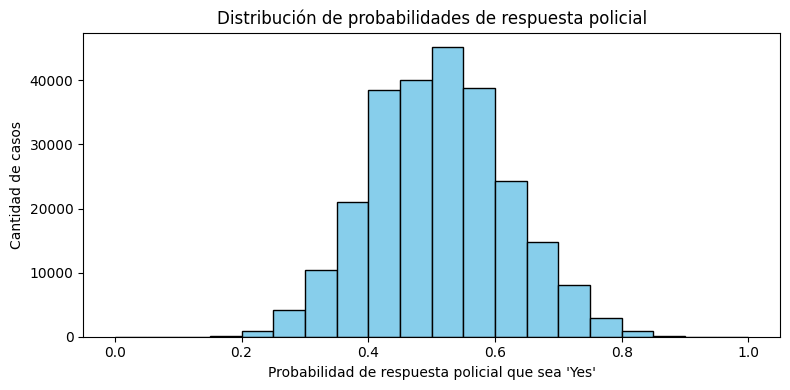

In [76]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 4))
plt.hist(probabilidades_yes, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
plt.xlabel("Probabilidad de respuesta policial que sea 'Yes'")
plt.ylabel('Cantidad de casos')
plt.title('Distribución de probabilidades de respuesta policial')
plt.tight_layout()
plt.show()

Las probabilidades que el modelo de regresión logística nos entregó pueden transformarse en decisiones operativas considerando los recursos limitados. Una forma de hacerlo es definir un limite mínimo de probabilidad a partir del cual se decide despachar, ajustándolo según la capacidad disponible para no superar el número de casos que se pueden atender. Otra alternativa es priorizar directamente los casos con mayor probabilidad en cada turno, por ejemplo, los 15% de los casos con mayor probabilidad por turno, lo que asegura cumplir siempre con la restricción de recursos. También se puede aplicar otro tipo de priorización, por ejemplo uno donde las probabilidades altas implican despacho inmediato, las medias requieren una verificación rápida y las bajas se dejan en seguimiento, o bien, ajustar el limite en función de los costos de equivocarse, bajándolo cuando el costo de no atender es más grave que el de enviar un recurso innecesario. En este caso, como la distribución de probabilidades se concentra en valores intermedios, ya que en la mayoría de los casos tiene una probabilidad de respuesta de entre un 40% a 60%, lo más recomendable es usar una política de que se prioricen los casos con mayor probabilidad, por ejemplo, el 15% de los casos con mayor probabilidad, para que se aproveche mejor los recursos.

## Misión 3: Indice de riesgo vial

Ahora vamos a estimar el riesgo vial usando un modelo de clasificación para predecir la severidad de los accidentes en cada zona y fecha, usando los modelos Random Forest y Regresión Logística, como en las misiones anteriores. El riesgo se calculará como la probabilidad de accidentes severos en cada zona y fecha.

Primero, lo que haremos es crear una columna de severidad

In [77]:
df["Accident_Severity"].value_counts()

Accident_Severity
Slight     210004
Serious     37112
Fatal        2972
Name: count, dtype: int64

Codificamos la severidad como binaria: 1 si es severo, 0 si no. Luego, ajusta el valor según tu dataset (por ejemplo, si Accident_Severity==3 es severo)

In [78]:

df['Severo'] = (df['Accident_Severity'] == df['Accident_Severity'].max()).astype(int)
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Severo
0,2016010000005,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,-,No tow/articulation,Did not leave carriageway,0.0,U-turn,1,Taxi/Private hire car,No,Offside,1
1,2016010000005,A,4006.0,-,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Motorcycle 50cc and under,No,Front,1
2,2016010000006,A,207.0,Unclassified,0.0,Slight,-,2016-11-01,Tuesday,Yes,...,Skidded and overturned,No tow/articulation,Nearside,0.0,Going ahead other,1,Car,No,Nearside,1
3,2016010000008,A,4020.0,A,4020.0,Slight,-,2016-11-01,Tuesday,Yes,...,Overturned,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,1
4,2016010000016,A,217.0,A,217.0,Slight,-,2016-11-01,Tuesday,Yes,...,-,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Bus or coach (17 or more pass seats),No,Did not impact,1


Seleccionamos las columnas que vamos a usar como características. Usamos 'Local_Authority_(District)' y 'Date', y además todas las columnas que no sean 'Accident_Severity', 'Severo' ni 'Accident_Index'


Ordenamos los datos de la columna de la fecha para que se muestren con claridad.

In [79]:
fecha = pd.to_datetime(df['Date'], errors='coerce')
df['anio'] = fecha.dt.year
df['mes'] = fecha.dt.month
df['dia_semana'] = fecha.dt.dayofweek

In [80]:
columnas_caracteristicas = []

# Agregamos todas las demás columnas excepto las que no queremos usar, para este caso lo haremos manual.
for columna in df.columns:
    if columna not in ['Accident_Severity', 'Severo', 'Accident_Index', 'Local_Authority_(District)', 'Date']:
        columnas_caracteristicas.append(columna)

columnas_caracteristicas

['1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(Highway)',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'LSOA_of_Accident_Location',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Driver_Home_Area_Type',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Skidding_and_Overturning',
 'Towing_an

Creamos la matriz de caracteristicas y nuestro target.

In [81]:
X = df[columnas_caracteristicas]
y = df['Severo']

In [82]:
# Solicité al chat un codigo para esconder las warnings, ya que el del inicio no me tapaba las que me aparecía acá

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter('ignore', SettingWithCopyWarning)

# Codificamos las variables categóricas

label_encoders = {} # Creamos un diccionario para guardar los LabelEncoders de cada columna categorica por si queremos invertir después
for columna in X.select_dtypes(include='object').columns:
    label = LabelEncoder()
    X[columna] = label.fit_transform(X[columna])
    label_encoders[columna] = label

label_encoders

{'1st_Road_Class': LabelEncoder(),
 '2nd_Road_Class': LabelEncoder(),
 'Carriageway_Hazards': LabelEncoder(),
 'Day_of_Week': LabelEncoder(),
 'Did_Police_Officer_Attend_Scene_of_Accident': LabelEncoder(),
 'Junction_Control': LabelEncoder(),
 'Junction_Detail': LabelEncoder(),
 'Light_Conditions': LabelEncoder(),
 'Local_Authority_(Highway)': LabelEncoder(),
 'LSOA_of_Accident_Location': LabelEncoder(),
 'Police_Force': LabelEncoder(),
 'Road_Surface_Conditions': LabelEncoder(),
 'Road_Type': LabelEncoder(),
 'Special_Conditions_at_Site': LabelEncoder(),
 'Time': LabelEncoder(),
 'Urban_or_Rural_Area': LabelEncoder(),
 'Weather_Conditions': LabelEncoder(),
 'InScotland': LabelEncoder(),
 'Age_Band_of_Driver': LabelEncoder(),
 'Driver_Home_Area_Type': LabelEncoder(),
 'Hit_Object_in_Carriageway': LabelEncoder(),
 'Hit_Object_off_Carriageway': LabelEncoder(),
 'Journey_Purpose_of_Driver': LabelEncoder(),
 'Junction_Location': LabelEncoder(),
 'make': LabelEncoder(),
 'model': LabelEncod

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Entrenamos Random Forest
random_forest = RandomForestClassifier(
    n_estimators=600,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

In [85]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=600, n_jobs=-1, random_state=42)

Ahora, obtenemos las probabilidades de que el accidente haya sido severo.

In [86]:
probabilidades_severo_random_forest = random_forest.predict_proba(X_test)[:, 1]
probabilidades_severo_random_forest

array([0.85447882, 0.74148602, 0.74959791, ..., 0.81171377, 0.55649183,
       0.79079686])

In [87]:
probabilidades_severo_random_forest

array([0.85447882, 0.74148602, 0.74959791, ..., 0.81171377, 0.55649183,
       0.79079686])

Recuperamos zona y fecha originales para los datos que serán testeados para agruparlos, por zona y por mes.

In [88]:

zona_test = df.loc[X_test.index, 'Local_Authority_(District)']
fecha_dt_test = pd.to_datetime(df.loc[X_test.index, 'Date'], errors='coerce')
mes_test = fecha_dt_test.dt.to_period('M').astype(str)

Y por último calculamos el riesgo por zona y mes, según lo que nos entregó el modelo, con la creación de un nuevo DataFrame. Por lo cual, creamos un DataFrame del riesgo agrupado por zona y fecha. 

In [89]:
riesgo = pd.DataFrame({'Zona': zona_test,'Mes': mes_test,'Probabilidad_Severo': probabilidades_severo_random_forest})

Ahora, agrupamos las probabilidades predichas de severidad por accidente por zona y mes, y calculamos para cada agrupación la probabilidad media de severidad (promedio de `Probabilidad_Severo`) y el número de accidentes severos, estimando la cantidad de casos severos esperados mediante la multiplicación de esa probabilidad media por la cantidad de casos de accidentes severos. Luego ordenamos las combinaciones por mayor probabilidad y, ante empates, lo ordenamos según los casos mayores.


In [90]:
resumen_riesgo = (
    riesgo.groupby(['Zona', 'Mes'])
          .agg(probabilidad_ocurrencia_severo=('Probabilidad_Severo', 'mean'),
               Casos_severos_ocurridos=('Probabilidad_Severo', 'size'))
          .reset_index()
)
resumen_riesgo['numero_casos_severos_esperados'] = resumen_riesgo['probabilidad_ocurrencia_severo'] * resumen_riesgo['Casos_severos_ocurridos']

resumen_riesgo = resumen_riesgo.sort_values(['probabilidad_ocurrencia_severo', 'Casos_severos_ocurridos'], ascending=[False, False])
resumen_riesgo.head(30)

,Zona,Mes,probabilidad_ocurrencia_severo,Casos_severos_ocurridos,numero_casos_severos_esperados
2299,Merthyr Tydfil,2016-11,0.933106,1,0.933106
2291,Merthyr Tydfil,2016-01,0.919247,1,0.919247
730,Cheltenham,2016-02,0.894422,3,2.683265
149,Barking and Dagenham,2016-07,0.893041,12,10.716486
1270,East Renfrewshire,2016-03,0.887326,1,0.887326
806,Chiltern,2016-06,0.887034,2,1.774067
148,Barking and Dagenham,2016-06,0.880118,12,10.561418
314,Blaenau Gwent,2016-04,0.875512,1,0.875512
150,Barking and Dagenham,2016-08,0.871757,23,20.050402
3622,Stevenage,2016-08,0.871175,3,2.613525


Ahora bien, es necesario de visualizaciones de estas probabilidades junto con estos casos ocurridos para poder entender de mejor bandera cuando y donde ocurren los accidentes de mayor riesgo. 

Comenzaremos con un Heatmap por zona y mesa

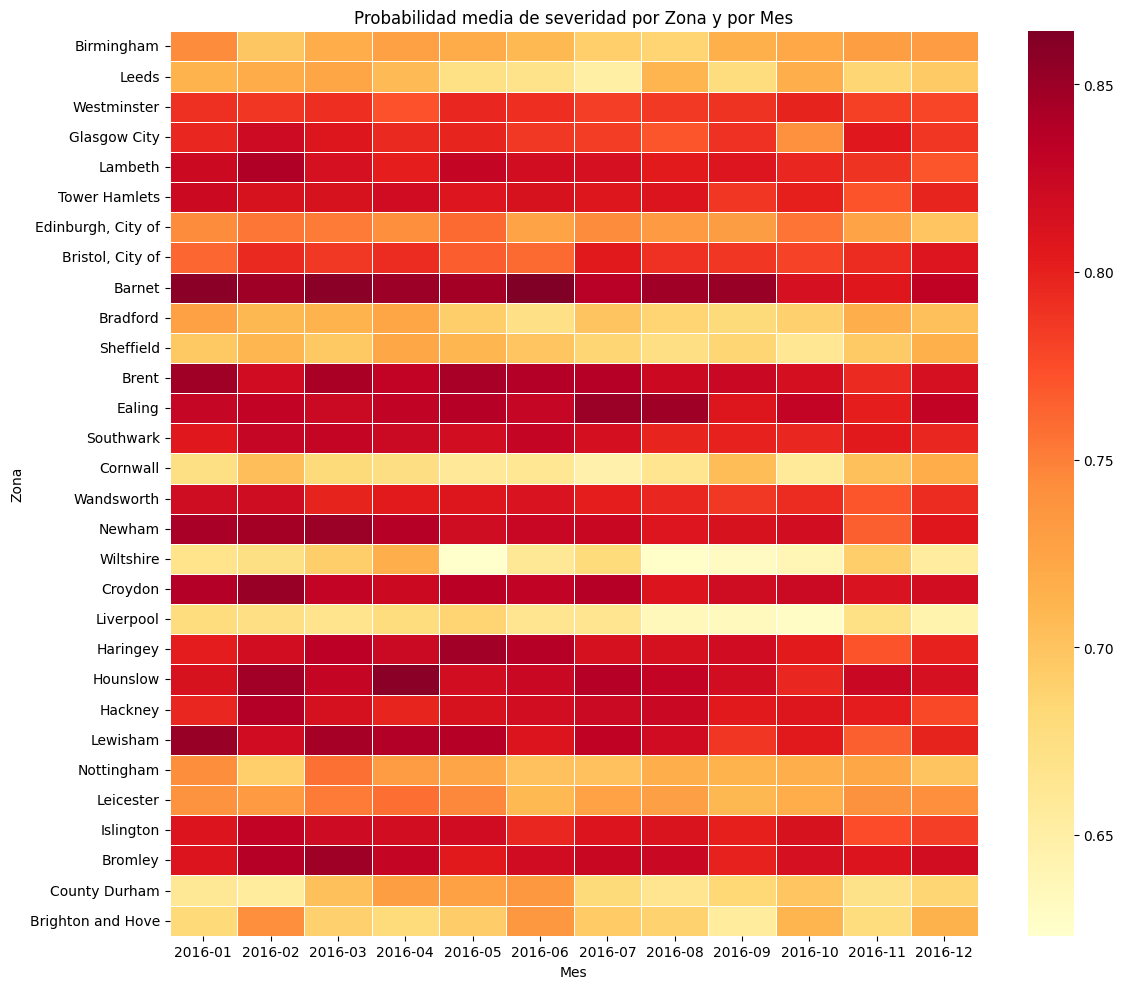

In [91]:
meses_periodo = pd.PeriodIndex(resumen_riesgo['Mes'].unique(), freq='M').sort_values()
orden_meses = meses_periodo.astype(str)

# Ordenamos las zonas por severos esperados totales
zonas_orden = (
    resumen_riesgo.groupby('Zona')['numero_casos_severos_esperados']
    .sum().sort_values(ascending=False).index)

probabilidades = resumen_riesgo.pivot_table(
    index='Zona', columns='Mes', values='probabilidad_ocurrencia_severo', aggfunc='mean'
).reindex(index=zonas_orden, columns=orden_meses)


probabilidades = probabilidades.head(30) # Mostramos solo las 30 zonas con mayor riesgo
plt.figure(figsize=(12, max(6, int(len(probabilidades)*0.35))))
sns.heatmap(probabilidades, cmap='YlOrRd', linewidths=0.5, linecolor='white')
plt.title('Probabilidad media de severidad por Zona y por Mes')
plt.xlabel('Mes')
plt.ylabel('Zona')
plt.tight_layout()
plt.show()


También podemos hacerlo por los casos severes esperados por zona y por cada mes, en vez de la probabilidad.

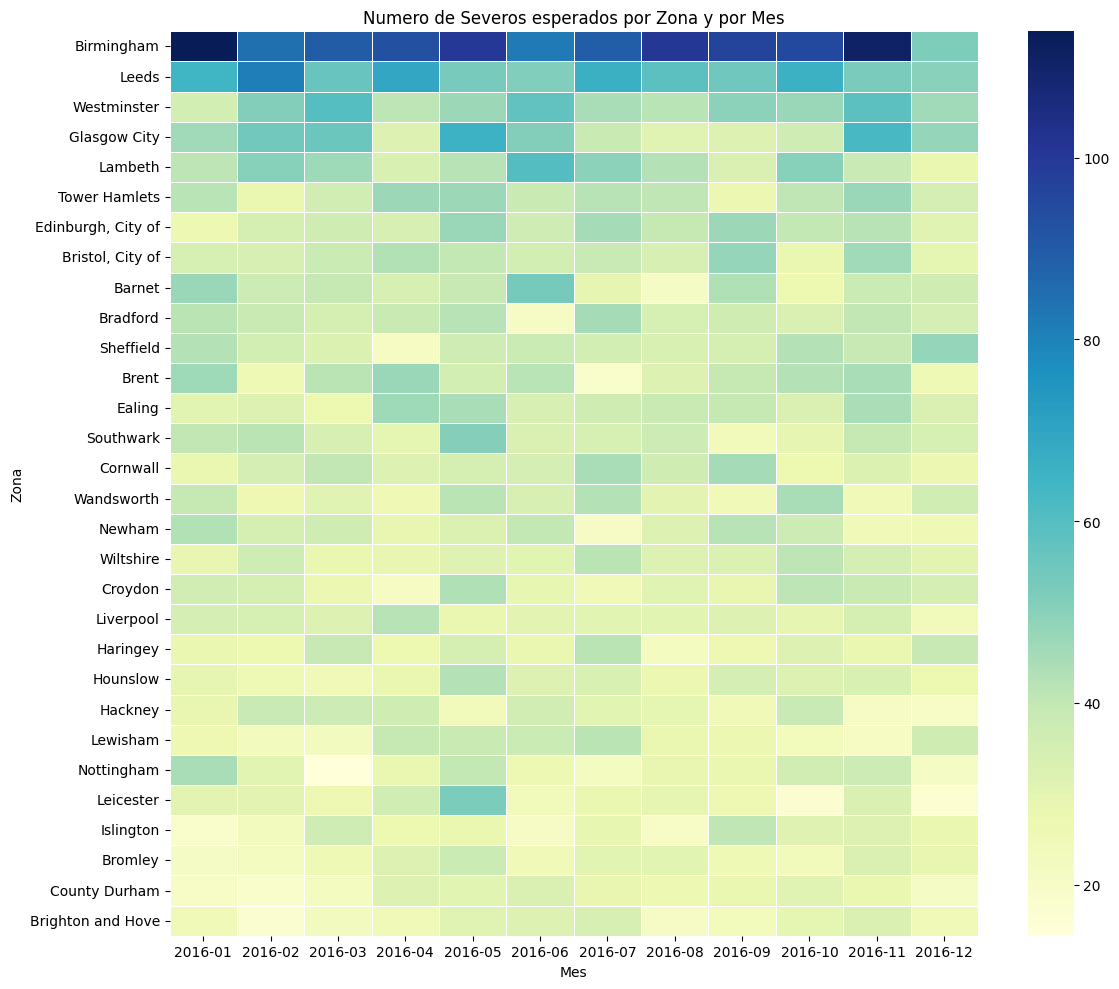

In [92]:
severos_esperados = resumen_riesgo.pivot_table(
    index='Zona', columns='Mes', values='numero_casos_severos_esperados', aggfunc='sum'
).reindex(index=zonas_orden, columns=orden_meses)

severos_esperados = severos_esperados.head(30)
plt.figure(figsize=(12, max(6, int(len(severos_esperados)*0.35))))
sns.heatmap(severos_esperados, cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('Numero de Severos esperados por Zona y por Mes')
plt.xlabel('Mes')
plt.ylabel('Zona')
plt.tight_layout()
plt.show()


Y si se quiere analizar netamente el panorama general de las zonas, es posible visualizar las 15 con más casos severos acumulados esperados, es decir, aquellas que dada la información que tenemos de la data, se espera que tengan más casos severos. 

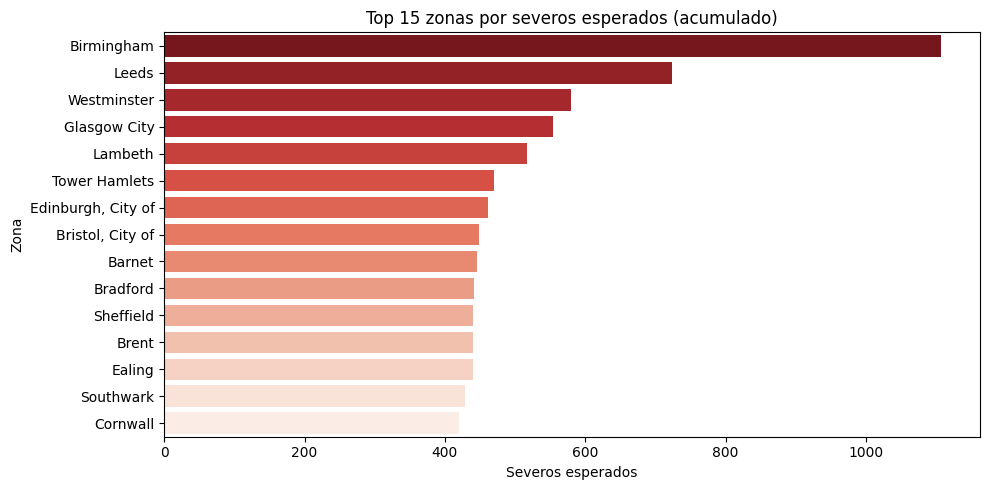

In [93]:
ranking_zonas = (
    resumen_riesgo.groupby('Zona')['numero_casos_severos_esperados']
    .sum().sort_values(ascending=False).head(15)
)
plt.figure(figsize=(10, 5))
sns.barplot(x=ranking_zonas.values, y=ranking_zonas.index, orient='h', palette='Reds_r')
plt.title('Top 15 zonas por severos esperados (acumulado)')
plt.xlabel('Severos esperados')
plt.ylabel('Zona')
plt.tight_layout()
plt.show()


Finalmente, visualizamos como es la tendencia mensual de riesgo, entre la probabilidad media por mes y los casos severos esperados, también por cada mes. 

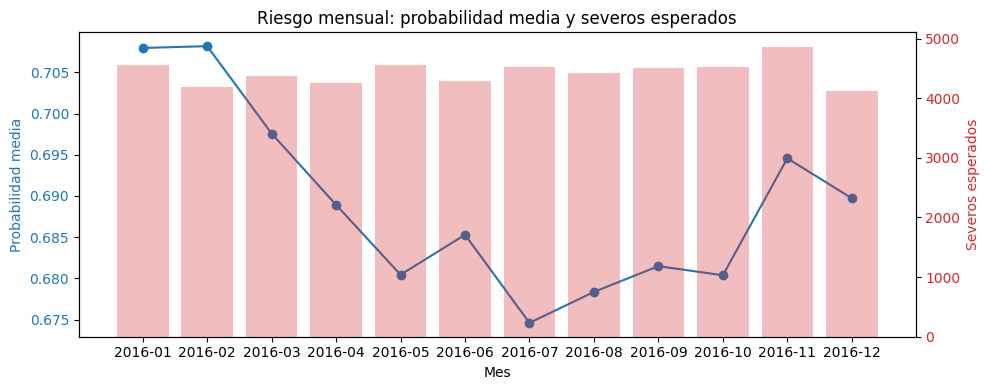

In [94]:
mes = (
    resumen_riesgo.groupby('Mes')
    .agg(probabilidad_media=('probabilidad_ocurrencia_severo', 'mean'),
         severos_esperados=('numero_casos_severos_esperados', 'sum'))
    .reindex(index=orden_meses)
)
fig, ax1 = plt.subplots(figsize=(10, 4))
color1 = 'tab:blue'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Probabilidad media', color=color1)
ax1.plot(mes.index, mes['probabilidad_media'], marker='o', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx() # Sirve para que se contengan barras, además de solo la linea de tendencia. 
color2 = 'tab:red'
ax2.set_ylabel('Severos esperados', color=color2)
ax2.bar(mes.index, mes['severos_esperados'], alpha=0.3, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Riesgo mensual: probabilidad media y severos esperados')
fig.tight_layout()
plt.show()
